# ***Relatório 1 - Resolução Numérica de Equações Algébricas e Transcendentes.***

# **Imports**

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import time
import psutil

# **Função para Plotagem Gráfica**

In [ ]:
def plotagem(f, a, b):
  x_vals = np.linspace(a, b, 500)
  y_vals = f(x_vals)

  plt.plot(x_vals, y_vals)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Gráfico de f(x)')
  plt.grid(True)
  plt.axhline(y=0, color='black', linestyle='dashed')
  plt.show()

# **Método da Bissecção**

In [ ]:
def bisseccao(a, b, epsilon=None, max_iterations=None):
    if f(a) * f(b) > 0:
        return None

    iterations = 0
    while True:
        c = (a + b) / 2
        fc = f(c)

        if fc == 0 or (epsilon is not None and abs(b - a) < epsilon) or (max_iterations is not None and iterations >= max_iterations):
            return iterations, c

        if f(a) * fc < 0:
            b = c
        else:
            a = c

        iterations += 1


# **Método Raphson**

In [ ]:
def newton_raphson(func, x0, epsilon, max_iterations):
    x = sp.Symbol('x')
    f = sp.sympify(func)
    f_prime = f.diff(x)
    f = sp.lambdify(x, f)
    f_prime = sp.lambdify(x, f_prime)

    x_n = x0
    iteration = 0
    if max_iterations is not None and epsilon is not None:
      while abs(f(x_n)) > epsilon and iteration < max_iterations:
        if f_prime(x_n) == 0:
          return None
        x_n = x_n - f(x_n) / f_prime(x_n)
        iteration += 1

      if abs(f(x_n)) <= epsilon:
          return iteration, x_n
      else:
          return None
    if max_iterations == None:
      while abs(f(x_n)) > epsilon:
        if f_prime(x_n) == 0:
          return None
        x_n = x_n - f(x_n) / f_prime(x_n)
        iteration += 1

      if abs(f(x_n)) <= epsilon:
          return iteration, x_n
      else:
          return None

# **Método da Falsa Posição**

In [ ]:
def falsa_posicao(a, b, epsilon, max_iterations):
    if f(a) * f(b) >= 0:
        return None

    x = (a * f(b) - b * f(a)) / (f(b) - f(a))
    iterations = 0

    if max_iterations is None:
        while abs(f(x)) > epsilon:
            iterations += 1
            if f(a) * f(x) < 0.0:
                b = x
            else:
                a = x
            x = (a * f(b) - b * f(a)) / (f(b) - f(a))
    else:
        while abs(f(x)) > epsilon and iterations < max_iterations:
            iterations += 1
            if f(a) * f(x) < 0.0:
                b = x
            else:
                a = x
            x = (a * f(b) - b * f(a)) / (f(b) - f(a))

    return iterations, x


# **Método da Secante**

In [ ]:
def secante(f, x0, x1, epsilon, max_iterations):
    iterations = 0
    if max_iterations is None:
      while abs(f(x1)) > epsilon:
          x_new = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
          x0, x1 = x1, x_new
          iterations += 1
    else:
      while abs(f(x1)) > epsilon and iterations < max_iterations:
          x_new = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
          x0, x1 = x1, x_new
          iterations += 1
    return iterations, x1


# **Exercício 1**



> Considere o polinômio P (x) = x³ - 36x² + 188x - 240

Verifique que um dos zeros de P(x) se localiza no intervalo [29.5, 31].
Para aproximar o zero referido, podem ser usadas diferentes estratégias como, por
exemplo:

---


1.   Método da Bissecção no referido intervalo, com tol= 10e-4;
2.   Método de Newton-Raphson, com a aproximação inicial x(0) = 29.5 e tol= 10e-4

Compare os resultados obtidos com os dois métodos

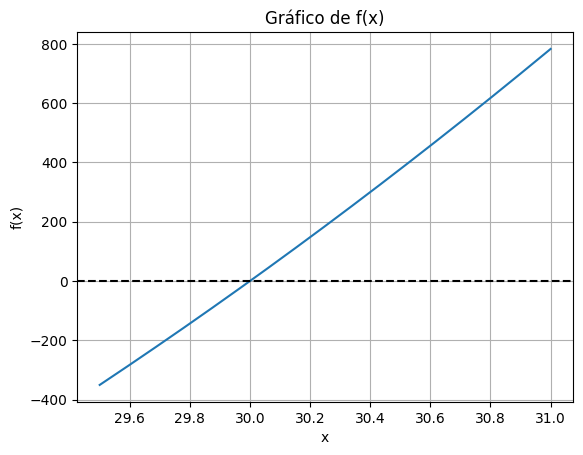


---Método da Bissecção---
Os resultados foram: 
Número de iterações: 11
A raiz aproximada é: 29.9998779296875

---Método de Newton Raphson---
Os resultados foram: 
Número de iterações: 3
A raiz aproximada é: 30.00000000006042


In [ ]:
def f(x):
  return x**3 - 36*x**2 + 188*x - 240
a = 29.5
b = 31.0
plotagem(f, a, b)
# Chamada para Bissecção
print("\n---Método da Bissecção---")
print("Os resultados foram: ")
a = 29.5
b = 31.0
epsilon = 10e-4
max_iterations = None
resultado = bisseccao(a, b, epsilon, max_iterations)
if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes, raiz = resultado
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)
# Chamada para Método raphson
print("\n---Método de Newton Raphson---")
print("Os resultados foram: ")

func = 'x**3 - 36*x**2 + 188*x - 240'
x0 = 29.5
epsilon = 1e-4
max_iterations = 100
resultado = newton_raphson(func, x0, epsilon, max_iterations)

if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes, raiz = resultado
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)



> Resultados Obtidos
Esses resultados nos mostram, que apesar do método da bissecção nos trazer um resultado mais aproximado, ele teve uma perfomance pior em relação ao de newton raphson, onde raphson teve somente 3 repetições e a bissecção teve 11.

#**Exercício 2**

Aplique o método da Falsa Posição para calcular a raiz de x² - 5 = 0 com tol =
0.01


---


1.   partindo do intervalo inicial [2,2.5];
2.   partindo do intervalo inicial [2,3].

Podemos afirmar que a raiz exata x = x' ± tol ? Justifique


Chamada para falsa posição

Intervalo [2, 2.5]
Número de iterações: 1
A raiz aproximada é: 2.2352941176470584

Intervalo [2, 3]
Número de iterações: 2
A raiz aproximada é: 2.2352941176470584


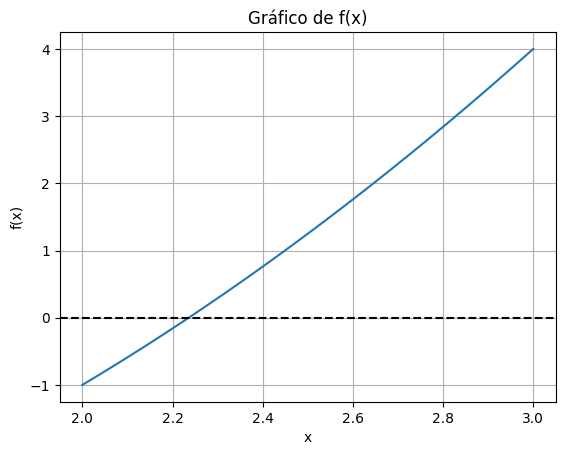

In [ ]:
def f(x):
  return x**2 - 5

# chamada do método de falsa posição para intervalos [2, 2.5] e [2,3]
print("Chamada para falsa posição")
print("\nIntervalo [2, 2.5]")
a = 2
b = 2.5
e = 0.01
max_interacoes = None
resultado = falsa_posicao(a, b, e, max_interacoes)

if resultado is None:
    print("Não foi possível realizar o cálculo")
else:
    iteracoes, raiz = resultado
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)
print("\nIntervalo [2, 3]")
a = 2
b = 3
e = 0.01
max_interacoes = None
resultado2 = falsa_posicao(a, b, e, max_interacoes)

if resultado2 is None:
    print("Não foi possível realizar o cálculo")
else:
    iteracoes2, raiz2 = resultado2
    print("Número de iterações:", iteracoes2)
    print("A raiz aproximada é:", raiz2)

plotagem(f, a, b)

Não podemos afirmar, mas com certeza é um valor muito próximo, visto que a raiz exata para essa função é x ≈ 2.23607.
caso somarmos o resultado ao epsilon, teremos um resultado mais longe do aproximado

#**Exercício 3**

Considere a equação e^1/x - x = 0.


---



1.   Mostre graficamente que a equação anterior tem uma única raiz no intervalo
[1,2].
2.    Considere a aproximação inicial x(0) = 1. Verifique o método de Newton -
Raphson converge.



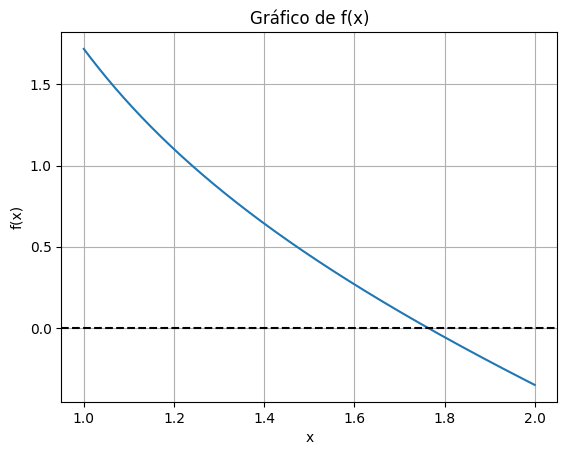


---Método de Newton Raphson---
Número de iterações: 6
A raiz aproximada é: 1.7632228343518968


In [ ]:
# Chamada para Método raphson
def f(x):
  return np.exp(1/x) - x
a = 1
b = 2
plotagem(f, a, b)
print("\n---Método de Newton Raphson---")
x = sp.Symbol('x')
func = sp.exp(1/x) - x
x0 = 1.0
epsilon = 10e-10000
max_iterations = 1000000
resultado = newton_raphson(func, x0, epsilon, max_iterations)

if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes, raiz = resultado
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)

# **Exercício 4**

A recolha de energia solar através da focagem de um campo plano de espelhos
numa central de recolha foi estudada por Vant-Hull (1976).

A equação para a concentração geométrica do fator C é dada por:

\begin{equation}
c = \frac{\pi \left(\frac{h}{\cos(A)}\right)^2 F}{0.5 \pi D^2 (1 + \sin(A) - 0.5 \cos(A))}
\end{equation}

em que:
\begin{align*}
A & \text{ é o ângulo do campo} \\
F & \text{ é a cobertura da fração do campo com espelhos} \\
D & \text{ é o diâmetro do coletor} \\
h & \text{ é o comprimento do coletor}
\end{align*}

Considerando os seguintes valores:
\begin{align*}
h & = 300 \\
F & = 0.8 \\
D & = 14 \\
\end{align*}

Vamos calcular o ângulo positivo A inferior a $\frac{\pi}{25}$ para o qual a concentração do fator C é 1200.

Utilizaremos o método iterativo com critério de paragem $\varepsilon_1 = \varepsilon_2 = 1e-3$ ou no máximo 3 iterações.


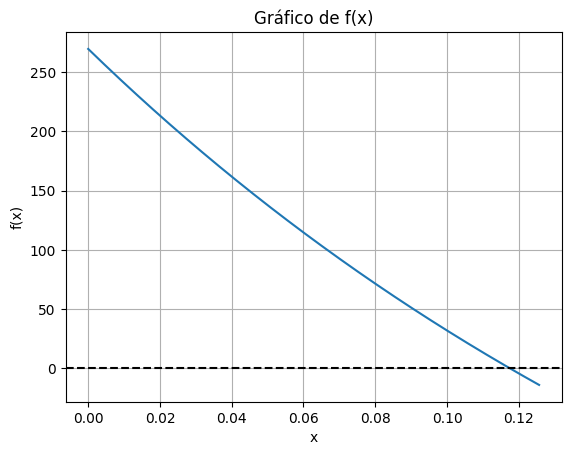


---Método da Bissecção---
Os resultados foram: 
Número de iterações: 3
A raiz aproximada é: 0.11780972450961726
Usando outros Métodos

Utilizando o Método da falsa posição
Número de iterações: 3
A raiz aproximada é: 0.11763429627155864

Utilizando o Método da Secante
Número de iterações: 3
A raiz aproximada é: 0.11760920302195922


In [ ]:
def f(x):
    h = 300
    F = 0.8
    D = 14
    cos_A = np.cos(x)
    sen_A = np.sin(x)
    pi = np.pi

    numerador = pi * (h / cos_A) ** 2 * F
    denominador = 0.5 * pi * D ** 2 * (1 + sen_A - 0.5 * cos_A)

    f = numerador / denominador

    return f - 1200
# Chamada para Bissecção
a = 0
b = np.pi / 25
plotagem(f, a, b)
print("\n---Método da Bissecção---")
a = 0
b = np.pi / 25
epsilon = 1e-3
max_iterations = 3
resultado = bisseccao(a, b, epsilon, max_iterations)
if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes, raiz = resultado
    print("Os resultados foram: ")
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)
print("Usando outros Métodos")
print("\nUtilizando o Método da falsa posição")
a = 0
b = np.pi / 25
e = 1e-3
max_interacoes = 3
resultado = falsa_posicao(a, b, e, max_interacoes)

if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes, raiz = resultado
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)
# Utilizando o método da secante
print("\nUtilizando o Método da Secante")
x0 = 0
x1 = np.pi / 25
epsilon = 1e-3
max_iterations = 3
resultado = secante(f, x0, x1, epsilon, max_iterations)
if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes, raiz = resultado
    print("Número de iterações:", iteracoes)
    print("A raiz aproximada é:", raiz)


Até a 3º casa decimais dos 3 métodos utilizados, o resultado da raiz se manteve o mesmo, a partir da 4 casa tivemos alguns valores mais aproximados

# **Exercício 5**

Um certo equipamento de 20000 reais vai ser pago durante 6 anos. O pagamento
anual é de 4000 reais. A relação entre o custo do equipamento P, o pagamento
anual A, o número de anos n e a taxa de juro i é a seguinte:

em que:
\begin{equation}
A = P \cdot \frac{{i \cdot(1+i)^n}}{{(1+i)^n - 1}}
\end{equation}


\begin{align*}
A & \text{ o pagamento anual} \\
P & \text{ A relação entre o custo do equipamento} \\
n & \text{ o número de anos } \\
i & \text{ a taxa de juro}
\end{align*}

Considerando os seguintes valores:
\begin{align*}
A & = R$4.000 \\
P & = R$20.000 \\
n & = 6 \\
i & = X
\end{align*}


Utilize os métodos da Bissecção, Falsa Posição, Newton-Raphson e Secante para
determinar a taxa de juro utilizada nos cálculos. O valor da taxa de juro pertence
ao intervalo [0.05, 0.15].

Para a paragem do processo iterativo use ε1 = ε2 = 0.05 ou no máximo 3 iterações.

Compare e explique os resultados obtidos por cada
método (por exemplo: rapidez da convergência e esforço computacional)

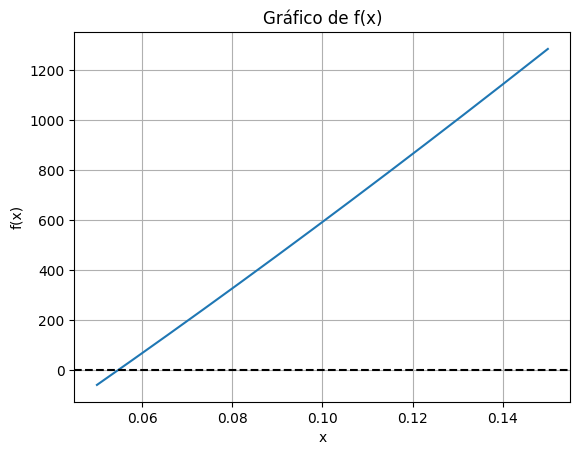




Método            Iterações       Raiz        Tempo  CPU
--------------  -----------  ---------  -----------  -----
Bisseção                  2  0.0625     0.000361204  35.3%
Falsa Posição             3  0.0547179  0.000320435  0.0%
Newton Raphson            2  0.0547179  0.0229414    66.7%
Secante                   3  0.0547179  0.000176907  0.0%


In [ ]:
def f(i):
    P = 20000
    n = 6
    A = 4000
    return (P*((i*(1+i)**n)/((1+i)**n-1)))-A
# Chamada para Bissecção
a = 0.05
b = 0.15
epsilon = 0.05
max_iterations = 3
inicio = time.time()
resultado = bisseccao(a, b, epsilon, max_iterations)
cpu_percent_bisseccao = psutil.cpu_percent()
fim = time.time()
t_decorrido_bisseccao = fim - inicio
if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes_bisseccao, raiz_bisseccao = resultado
inicio = time.time()
resultado = falsa_posicao(a, b, e, max_interacoes)
cpu_percent_f_posicao = psutil.cpu_percent()
fim = time.time()
t_decorrido_f_posicao = fim - inicio
if resultado is None:
    print("Não foi possível realizar o cálculo")
else:
    iteracoes_f_posicao, raiz_f_posicao = resultado
x = sp.Symbol('x')
P = 20000
n = 6
A = 4000
func = (P*((x*(1+x)**n)/((1+x)**n-1)))-A
x0 = 0.05
epsilon = 0.05
max_iterations = 3
inicio = time.time()
resultado = newton_raphson(func, x0, epsilon, max_iterations)
cpu_percent_raphson = psutil.cpu_percent()
fim = time.time()
t_decorrido_raphson = fim - inicio
if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes_raphson, raiz_raphson = resultado

x0 = 0.05
x1 = 0.15
epsilon = 0.05
max_iterations = 3
inicio = time.time()
resultado = secante(f, x0, x1, epsilon, max_iterations)
cpu_percent_secante = psutil.cpu_percent()
fim = time.time()
t_decorrido_secante = fim - inicio
if resultado is None:
    print("não convergiu para uma raiz.")
else:
    iteracoes_secante, raiz_secante = resultado

from tabulate import tabulate
a = 0.05
b = 0.15
plotagem(f, a, b)
# Dados da tabela
dados = [
    ['Bisseção', iteracoes_bisseccao, raiz_bisseccao, t_decorrido_bisseccao, f"{cpu_percent_bisseccao}%"],
    ['Falsa Posição', iteracoes_f_posicao, raiz_f_posicao, t_decorrido_f_posicao, f"{cpu_percent_f_posicao}%"],
    ['Newton Raphson', iteracoes_raphson, raiz_raphson, t_decorrido_raphson,  f"{cpu_percent_raphson}%"],
    ['Secante', iteracoes_secante, raiz_secante, t_decorrido_secante, f"{cpu_percent_secante}%"]
]

# Imprime a tabela usando tabulate
print("\n\n")
print(tabulate(dados, headers=['Método', 'Iterações', 'Raiz', 'Tempo', 'CPU']))

Somente o método da bissecção foi o mais impreciso, resultando raiz de 0.0625, enquanto todos os outros encontraram raiz de 0.0547179, do resultados de iterações o de Newton Raphson performou melhor, obtendo a raiz em apenas 2 iterações, enquanto a da falsa posição e a da secante ficaram em 3 iterações.

os parametros de tempo e cpu foram bastante imprecisos, variando bastante de execuções para execuções, talvez um problema do collab.